In [2]:
import networkit as nk
import matplotlib.pyplot as plt
import numpy as np
import glob

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

graph_folder = 'data/socfb/'
path = graph_folder + 'socfb-Brown11.SpaceOne'
g = nk.readGraph(path, nk.Format.EdgeListSpaceOne)

data_dir = '/Users/benjidayan/Documents/GIRG_data/'

<Figure size 800x400 with 0 Axes>

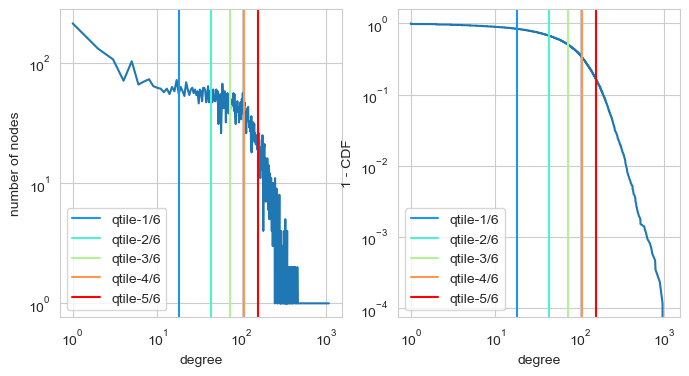

In [3]:
def plot_degree_dist(g, pl_fit=False, vlines=0):
    if type(g) is nk.graph.Graph:
        dd = sorted(nk.centrality.DegreeCentrality(g).run().scores(), reverse=True)
    elif type(g) is np.ndarray and np.issubdtype(g.dtype, np.integer):
        dd = sorted(np.ceil(g).astype(np.int64), reverse=True)
    else:
        raise Exception('g should be an nk Graph, or a np.ndarray of integers >=1')
    degrees, numberOfNodes = np.unique(dd, return_counts=True)
    # fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    plt.subplot(121)
    # plt.sca(axes[0])
    plt.xscale("log")
    plt.xlabel("degree")
    plt.yscale("log")
    plt.ylabel("number of nodes")
    # plt.scatter(degrees, numberOfNodes, s=1.1, marker='x')
    plt.plot(degrees, numberOfNodes)
    if pl_fit:
        fit = powerlaw.Fit(dd)
        xmin, xmax = fit.xmin, fit.xmax
        fit_bin_edges, fit_bin_proportions = fit.pdf()
        fit_bin_middles = [np.mean((fit_bin_edges[i], fit_bin_edges[i+1]))
                    for i in range(len(fit_bin_edges)-1)]
        plt.plot(fit_bin_middles, fit_pdf * len(fit.data), 'r')
        # plt.axvline(xmin, color='r')
    if vlines > 0:  # plot like quartile lines for number of nodes.
        # rough q-tiles
        q = vlines
        colors = plt.cm.rainbow(np.linspace(0, 1, q))
        rev_dd = list(reversed(dd))
        for i in range(1, q):
            plt.axvline(rev_dd[i * len(dd)//q], label=f'qtile-{i}/{q}', c=colors[i])
        plt.legend()
    # plt.show()
    plt.subplot(122)
    # plt.sca(axes[1])
    # ys, xs, _ = plt.hist(dd, cumulative=True, bins=50, density=True, histtype='step')
    # # plt.clf()   
    # plt.cla()
    # plt.xscale("log")
    # plt.xlabel("degree")
    # plt.yscale("log")
    # plt.ylabel("1 - CDF")
    # # ys[-1] is 1.0, so log(0.0) gives us trouble (but only sometimes idk why)
    # plt.plot(xs[:-1], np.concatenate([1-ys[:-1], 1-ys[-2:-1]]))

    one_minus_cdf = 1. * np.arange(len(dd)) / (len(dd) - 1)
    plt.xscale("log")
    plt.xlabel("degree")
    plt.yscale("log")
    plt.ylabel("1 - CDF")
    plt.plot(dd, one_minus_cdf)

    if vlines > 0:  # plot like quartile lines for number of nodes.
        # rough q-tiles
        q = vlines
        colors = plt.cm.rainbow(np.linspace(0, 1, q))
        rev_dd = list(reversed(dd))
        for i in range(1, q):
            plt.axvline(rev_dd[i * len(dd)//q], label=f'qtile-{i}/{q}', c=colors[i])
        plt.legend()
        
plt.figure(figsize=(8,4))
plot_degree_dist(g, vlines=6)

<Figure size 800x400 with 0 Axes>

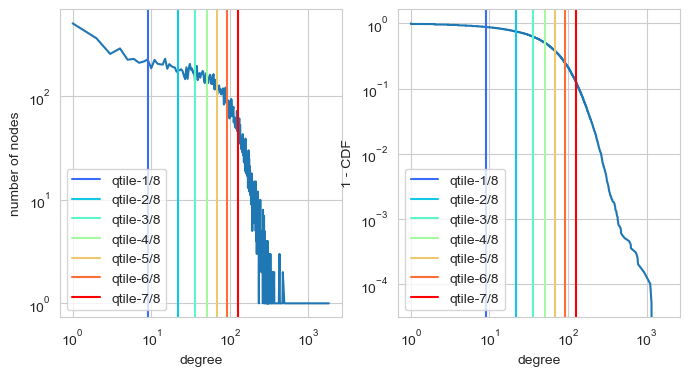

In [4]:
g = nk.readGraph('data/socfb/socfb-BU10.SpaceOne', nk.Format.EdgeListSpaceOne)
dd = sorted(nk.centrality.DegreeCentrality(g).run().scores(), reverse=True)
degrees, numberOfNodes = np.unique(dd, return_counts=True)

plt.figure(figsize=(8,4))
plot_degree_dist(g, vlines=8)

/var/folders/60/0t2c_bns6n3c7kjhdk4d4wk80000gn/T/ipykernel_28967/1193777074.py:12: RuntimeWarning: invalid value encountered in cast
  pareto_dd = np.floor(pareto).astype(np.int32)


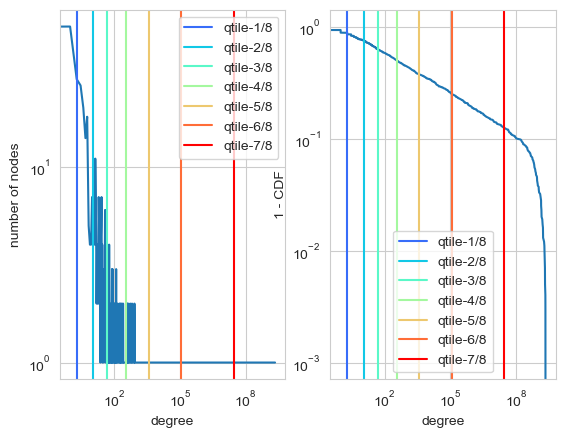

In [5]:
def powerlaw_dist(tau=2.5, x_min=1, size=1000):
    a = tau-1
    pareto = (np.random.pareto(a, size=size) + 1) * x_min
    return pareto

    # pdf: prop to x^-(a+1), i.e. tau = a+1
    # mean: ((tau-1) x_min)/(tau - 2) for tau > 2


tau = (2 + 1/70)
pareto = powerlaw_dist(tau=1.1)
pareto_dd = np.floor(pareto).astype(np.int32)
plot_degree_dist(pareto_dd, vlines=8)

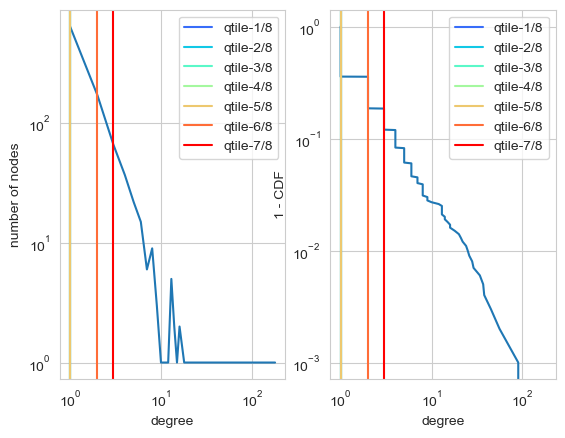

In [6]:
pareto = np.random.pareto(a=1.5, size=1000)
plot_degree_dist(pareto, vlines=8)
# dd = np.ceil(pareto).astype(np.int64)
# degrees, numberOfNodes = np.unique(dd, return_counts=True)
# # fig, axes = plt.subplots(1, 2, figsize=(8, 4))
# plt.subplot(121)
# # plt.sca(axes[0])
# plt.xscale("log")
# plt.xlabel("degree")
# plt.yscale("log")
# plt.ylabel("number of nodes")
# # plt.scatter(degrees, numberOfNodes, s=1.1, marker='x')
# plt.plot(degrees, numberOfNodes)


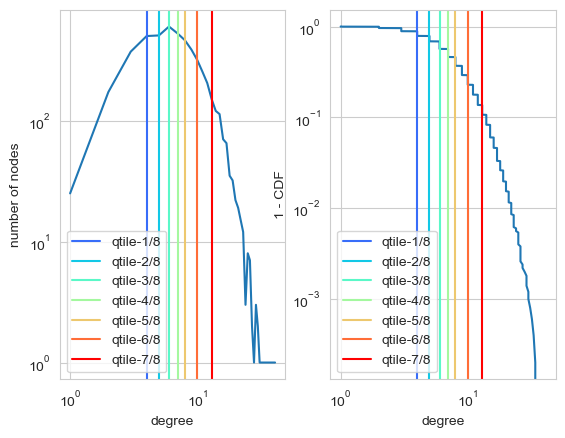

In [10]:
def F(x, k=0.5, pow=4):
    return 1 - np.exp(-0.1*x -(k * np.log(np.maximum(x, 1)))**pow)

def F_inv(z, k=0.5, pow=4):
    return np.exp(
        (- np.log(1 - z))**(1/pow) / k
    )

def sample_F(size=1000, **kwargs):
    us = np.random.uniform(size=size)
    ys = F_inv(us, **kwargs)
    return ys

# xs = np.arange(0, 50, 0.01)
# plt.plot(xs, F(xs))

ys = sample_F(5000, k=0.45, pow=4.5)
ys_int = np.floor(ys).astype(np.int64)
plot_degree_dist(ys_int, vlines=8)

<Figure size 800x400 with 0 Axes>

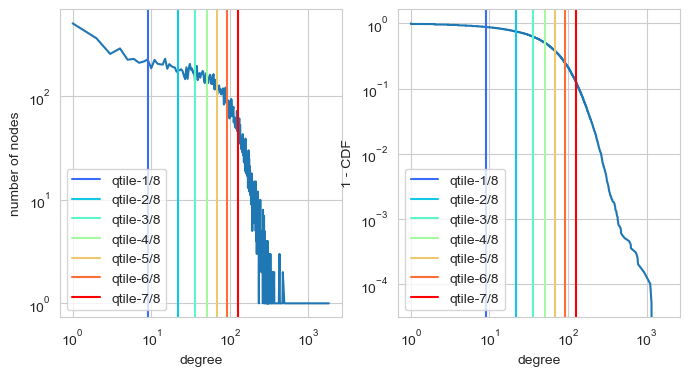

In [8]:
g = nk.readGraph('data/socfb/socfb-BU10.SpaceOne', nk.Format.EdgeListSpaceOne)
dd = sorted(nk.centrality.DegreeCentrality(g).run().scores(), reverse=True)
degrees, numberOfNodes = np.unique(dd, return_counts=True)

plt.figure(figsize=(8,4))
plot_degree_dist(g, vlines=8)